# dx-privacy preserving mechanism
![MADLIB mechanism](figure/MADLIB.png)

https://arxiv.org/pdf/1910.08902.pdf

## GPT2 with dx-privacy preserving mechanism

In [49]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import AutoTokenizer, GPT2Config, AutoModelForCausalLM
import numpy as np

config = GPT2Config.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained('gpt2', use_fast=not False)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
model = AutoModelForCausalLM.from_pretrained('gpt2', from_tf=bool(".ckpt" in 'gpt2'), config=config)

word = "my secret number is 9 4 0 9 9 5"  # Replace with your target word

#Privacy Preserving Mechanism
predicted_word_list = []
for i in word.split():
    # Step 1: Retrieve the vector representation of the word
    inputs = tokenizer(i, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        # outputs = model(**inputs, output_hidden_states=True)
        outputs = model.get_input_embeddings()(inputs['input_ids'][0]).squeeze()

    vector_representation = outputs.numpy() #.hidden_states[-1].mean(dim=1).squeeze().numpy()

    # # Step 2: Perturb the vector representation with noise sampled from a multivariate distribution
    # mean = np.zeros(vector_representation.shape)  # Mean of the multivariate distribution
    # covariance = np.eye(vector_representation.shape[0])  # Covariance matrix of the distribution
    # noise = np.random.multivariate_normal(mean, covariance, size=1)
    # noisy_representation = vector_representation + noise

    # Step 2: Perturb the vector representation with noise sampled from a normal distribution
    mean = 0.0  # Mean of the normal distribution
    std_dev = 0.5  # Standard deviation of the normal distribution
    noise = np.random.normal(mean, std_dev, size=vector_representation.shape)
    noisy_representation = vector_representation + noise

    # Step 3: Project the noisy representation of the word back to the discrete vocabulary space
    # Find the token that is closest in embedding space to the noisy representation
    embedding_weights = model.transformer.wte.weight.data.numpy()
    distances = np.linalg.norm(embedding_weights - noisy_representation, axis=1)
    closest_token_id = np.argmin(distances)

    # Convert the token ID back to the word
    predicted_word = tokenizer.decode([closest_token_id])
    predicted_word_list.append(predicted_word)

In [50]:
for ori, per in zip(word.split(), predicted_word_list):
    print(ori, per)

my my
secret secret
number number
is is
9 9
4  inducing
0 0
9 12
9  SHOW
5 5


## BERT with dx-privacy preserving mechanism

In [53]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

word = "my secret number is 9 4 0 9 9 5"  # Replace with your target word

# Privacy Preserving Mechanism
predicted_word_list = []
for i in word.split():
    # Step 1: Retrieve the vector representation of the word
    inputs = tokenizer(i, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    vector_representation = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # # Step 2: Perturb the vector representation with noise sampled from a multivariate distribution
    # mean = np.zeros(vector_representation.shape)  # Mean of the multivariate distribution
    # covariance = np.eye(vector_representation.shape[0])  # Covariance matrix of the distribution
    # noise = np.random.multivariate_normal(mean, covariance, size=1)
    # noisy_representation = vector_representation + noise

    # Step 2: Perturb the vector representation with noise sampled from a normal distribution
    mean = 0.0  # Mean of the normal distribution
    std_dev = 0.1  # Standard deviation of the normal distribution
    noise = np.random.normal(mean, std_dev, size=vector_representation.shape)
    noisy_representation = vector_representation + noise

    # Step 3: Project the noisy representation of the word back to the discrete vocabulary space
    # Find the token that is closest in embedding space to the noisy representation
    embedding_weights = model.get_input_embeddings().weight.data.numpy()
    distances = np.linalg.norm(embedding_weights - noisy_representation, axis=1)
    closest_token_id = np.argmin(distances)

    # Convert the token ID back to the word
    predicted_word = tokenizer.decode([closest_token_id])
    predicted_word_list.append(predicted_word)

In [54]:
for ori, per in zip(word.split(), predicted_word_list):
    print(ori, per)

my .
secret morris
number .
is letters
9 italian
4 4
0 morris
9 andrea
9 influenced
5 from


# Other Metric Differential Privacy
- BRR - Randomized Response (Hamming distance)
    https://arxiv.org/abs/2107.07923
- Manhattan distance & Hyperbolic distance
    https://arxiv.org/abs/1811.10256
- Euclidean distance
    This paper
- Mahalanobis Metric
    https://aclanthology.org/2020.privatenlp-1.2.pdf
- Vickrrey Mechanism
    https://arxiv.org/abs/1910.08917
- Truncated Gumbel distribution
    https://arxiv.org/pdf/2107.07928.pdf    

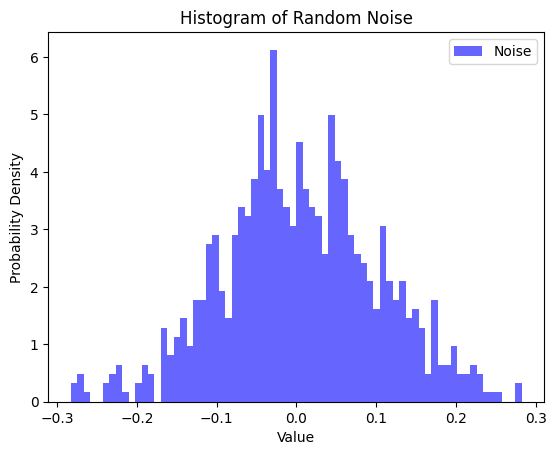

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = 0.0
std_dev = 0.1
vector_representation = 768
# Generate random noise
noise = np.random.normal(mean, std_dev, size=vector_representation)
# Create a histogram
plt.hist(noise, bins=70, density=True, alpha=0.6, color='b', label='Noise')
# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Random Noise')
plt.legend()
# Display the plot
plt.show()

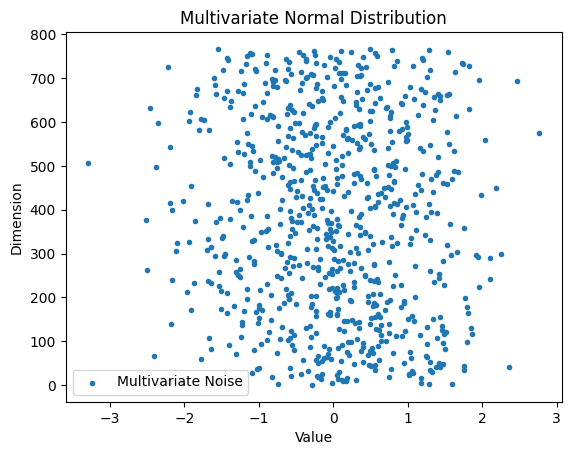

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
vector_representation = 768
# Mean of the multivariate distribution
mean = np.zeros(vector_representation)
# Covariance matrix of the distribution (identity matrix in this case)
covariance = np.eye(vector_representation)
# Generate random noise
noise = np.random.multivariate_normal(mean, covariance, size=1)
# Create a scatter plot for the multivariate normal distribution
plt.scatter(noise[0], range(vector_representation), marker='.', label='Multivariate Noise')
# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Dimension')
plt.title('Multivariate Normal Distribution')
plt.legend()
# Display the plot
plt.show()